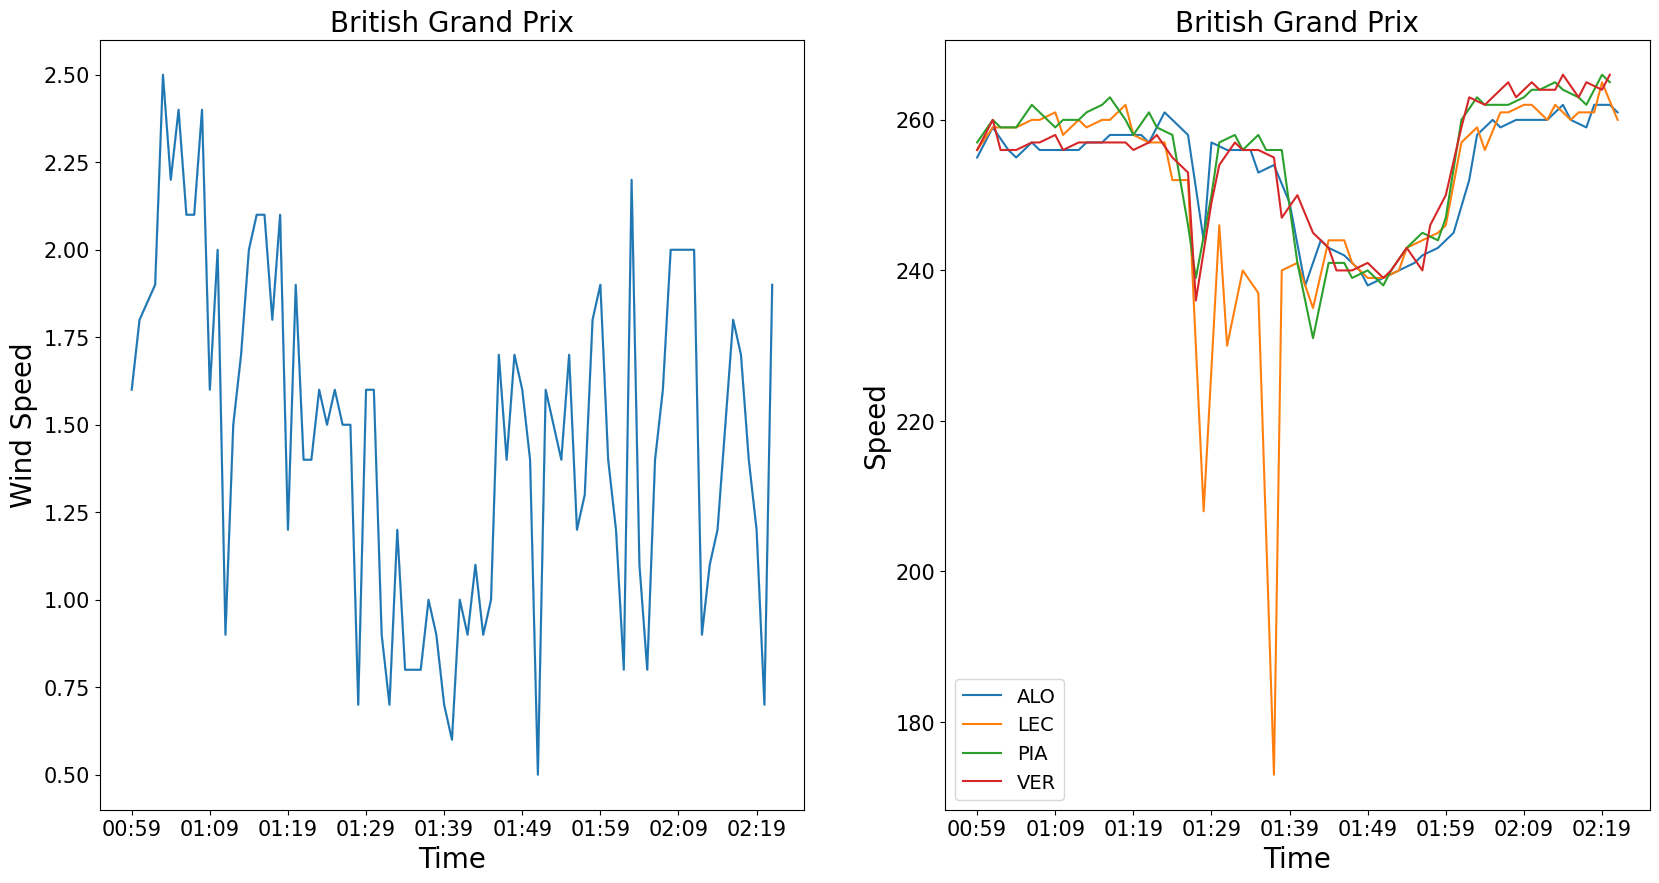

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Files = [
    '2024-British Grand Prix-Race.csv',
    '2024-British Grand Prix-Race-weather.csv'
]

Driver = ['ALO', 'LEC', 'PIA', 'VER']

a = pd.read_csv(Files[0])
aw = pd.read_csv(Files[1])


# Convert string to time value and sort enteries by Time
a['Time'] = pd.to_timedelta(a['Time'])
a['Time'] = (a['Time'].dt.total_seconds() // 60).astype(int)
a = a.sort_values(by='Time', ascending=True)

aw['Time'] = pd.to_timedelta(aw['Time'])
aw['Time'] = (aw['Time'].dt.total_seconds() // 60).astype(int)
aw = aw.sort_values(by='Time', ascending=True)

# Time of Day x Wind Speed
aws = aw[['Time', 'WindSpeed']]

# Time of Day x Driver 1 Speed
has = a.loc[a.Driver == Driver[0], ['Time', 'SpeedI2']]

# Time of Day x Driver 2 Speed
vas = a.loc[a.Driver == Driver[1], ['Time', 'SpeedI2']]

# Time of Day x Driver 3 Speed
las = a.loc[a.Driver == Driver[2], ['Time', 'SpeedI2']]

# Time of Day x Driver 4 Speed
pas = a.loc[a.Driver == Driver[3], ['Time', 'SpeedI2']]

# Plot graphs
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Wind Speed vs Time Graph
sns.lineplot(x=aws['Time'], y=aws['WindSpeed'], ax=axs[0])
axs[0].set_title(Files[0][5:-9], fontsize=20)
axs[0].set_ylabel("Wind Speed", fontsize=20)
axs[0].set_xlabel("Time", fontsize=20)
tick_locs1 = np.arange(aws['Time'].min(), aws['Time'].max(), 10)
axs[0].set_xticks(tick_locs1)
tick_labels1 = [f"{x//60:02}:{x%60:02}" for x in tick_locs1]
axs[0].set_xticklabels(tick_labels1, fontsize=15)
axs[0].tick_params(axis='y', labelsize=15)

# Driver Speed vs Time
sns.lineplot(x=has['Time'], y=has['SpeedI2'], label=Driver[0], ax=axs[1])
sns.lineplot(x=vas['Time'], y=vas['SpeedI2'], label=Driver[1], ax=axs[1])
sns.lineplot(x=las['Time'], y=las['SpeedI2'], label=Driver[2], ax=axs[1])
sns.lineplot(x=pas['Time'], y=pas['SpeedI2'], label=Driver[3], ax=axs[1])
axs[1].set_title(Files[0][5:-9], fontsize=20)
axs[1].set_ylabel("Speed", fontsize=20)
axs[1].set_xlabel("Time", fontsize=20)
tick_locs2 = np.arange(has['Time'].min(), has['Time'].max(), 10)
axs[1].set_xticks(tick_locs2)
tick_labels2 = [f"{x//60:02}:{x%60:02}" for x in tick_locs2]
axs[1].set_xticklabels(tick_labels2, fontsize=15)
axs[1].tick_params(axis='y', labelsize=15)
axs[1].legend(fontsize=14)